Script: To Create a web map for the study sites
Name: Nathan Namatama
Date: 2024

In [58]:
import folium
import os
import geopandas as gpd
import json

Loading a Shapefile

In [59]:
shapefile_path = r'F:\Collecting and Analysing Data\Maps\Shapefiles\Selection of Study Sites\Study_Sites_V1.shp'

In [60]:
Study_Sites = gpd.read_file(shapefile_path)

In [61]:
type (Study_Sites)

geopandas.geodataframe.GeoDataFrame

In [62]:
gdf = Study_Sites

In [72]:
Geojson_output_path = r'C:\Users\Naznamz\Notebook_Study_Sites\PPCR-Phase-II-Study-Sites\V1_Study_Sites.geojson'
gdf.to_file(Geojson_output_path, driver='GeoJSON')

<Axes: >

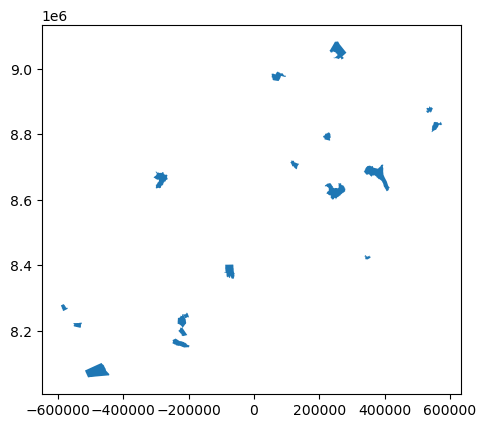

In [73]:
Study_Sites.plot()

Create a Folium map centered at a specific location

In [74]:
m = folium.Map(height=700, location=[-14, 30], zoom_start=6)
folium.LayerControl().add_to(m)
tooltip = folium.features.GeoJsonTooltip(fields=['DistName', 'WardNm2020'], labels=True, sticky=False)
folium.GeoJson(gdf, tooltip=tooltip).add_to(m))
m

SyntaxError: unmatched ')' (4036693218.py, line 4)

Add shapefile data to the map

folium.GeoJson(gdf, tooltip=folium.GeoJsonTooltip(fields=['DistName', 'WardNm2020'], labels=True, sticky=True)).add_to(m)

 Add tiles as background

In [75]:
html = Study_Sites.to_html()
popup = folium.Popup(html)
popup.add_to(m)

Specify the path where you want to save the map HTML file

In [76]:
output_path_html = r'C:\Users\Naznamz\Notebook_Study_Sites\PPCR-Phase-II-Study-Sites\V1_Study_Sites.html'

Ensure the directory exists, if not create it

In [77]:
output_dir = os.path.dirname(output_path)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

Save the map to an HTML file

In [78]:
m.save(output_path_html)